In [1]:
import tensorflow as tf
import keras

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.11.0
Keras version: 2.11.0


In [2]:
import os, json, shutil
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import tools

In [3]:
# Load configuration
if os.path.exists('config/localconfig.py'):
    from config import localconfig as config
else:
    from config import config

In [4]:
# List cone classes (bounding boxes)
tools.get_class('all')

[{'title': 'seg_orange_cone',
  'shape': 'bitmap',
  'color': '#FF8000',
  'geometry_config': {},
  'id': 9993505,
  'hotkey': ''},
 {'title': 'unknown_cone',
  'shape': 'rectangle',
  'color': '#3BDB0F',
  'geometry_config': {},
  'id': 9993514,
  'hotkey': ''},
 {'title': 'yellow_cone',
  'shape': 'rectangle',
  'color': '#FFFF00',
  'geometry_config': {},
  'id': 9993506,
  'hotkey': ''},
 {'title': 'seg_large_orange_cone',
  'shape': 'bitmap',
  'color': '#FF002A',
  'geometry_config': {},
  'id': 9993507,
  'hotkey': ''},
 {'title': 'seg_blue_cone',
  'shape': 'bitmap',
  'color': '#2A00FF',
  'geometry_config': {},
  'id': 9993508,
  'hotkey': ''},
 {'title': 'seg_unknown_cone',
  'shape': 'bitmap',
  'color': '#3BDB0F',
  'geometry_config': {},
  'id': 9993509,
  'hotkey': ''},
 {'title': 'seg_yellow_cone',
  'shape': 'bitmap',
  'color': '#FFFF00',
  'geometry_config': {},
  'id': 9993510,
  'hotkey': ''},
 {'title': 'blue_cone',
  'shape': 'rectangle',
  'color': '#2A00FF',
  

In [5]:
# Copy all data to one directory
dataset_dir = os.path.join(config.BB_DATASET_PATH, '..', 'full')
if not os.path.exists(dataset_dir):
    os.mkdir(dataset_dir)
    os.mkdir(os.path.join(dataset_dir, 'images'))
    os.mkdir(os.path.join(dataset_dir, 'annotations'))

    teams = [x for x in os.listdir(config.BB_DATASET_PATH) if os.path.isdir(os.path.join(config.BB_DATASET_PATH, x))]
    for t in teams:
        team_dir = os.path.join(config.BB_DATASET_PATH, t)
        images = os.path.join(team_dir, 'img')
        annotations = os.path.join(team_dir, 'ann')
        for i in os.listdir(images):
            src = os.path.join(images, i)
            dst = os.path.join(dataset_dir, 'images', i)
            shutil.copyfile(src, dst)
        for a in os.listdir(annotations):
            src = os.path.join(annotations, a)
            dst = os.path.join(dataset_dir, 'annotations', a)
            shutil.copyfile(src, dst)

Shape:  (1, 1480, 1880, 3)


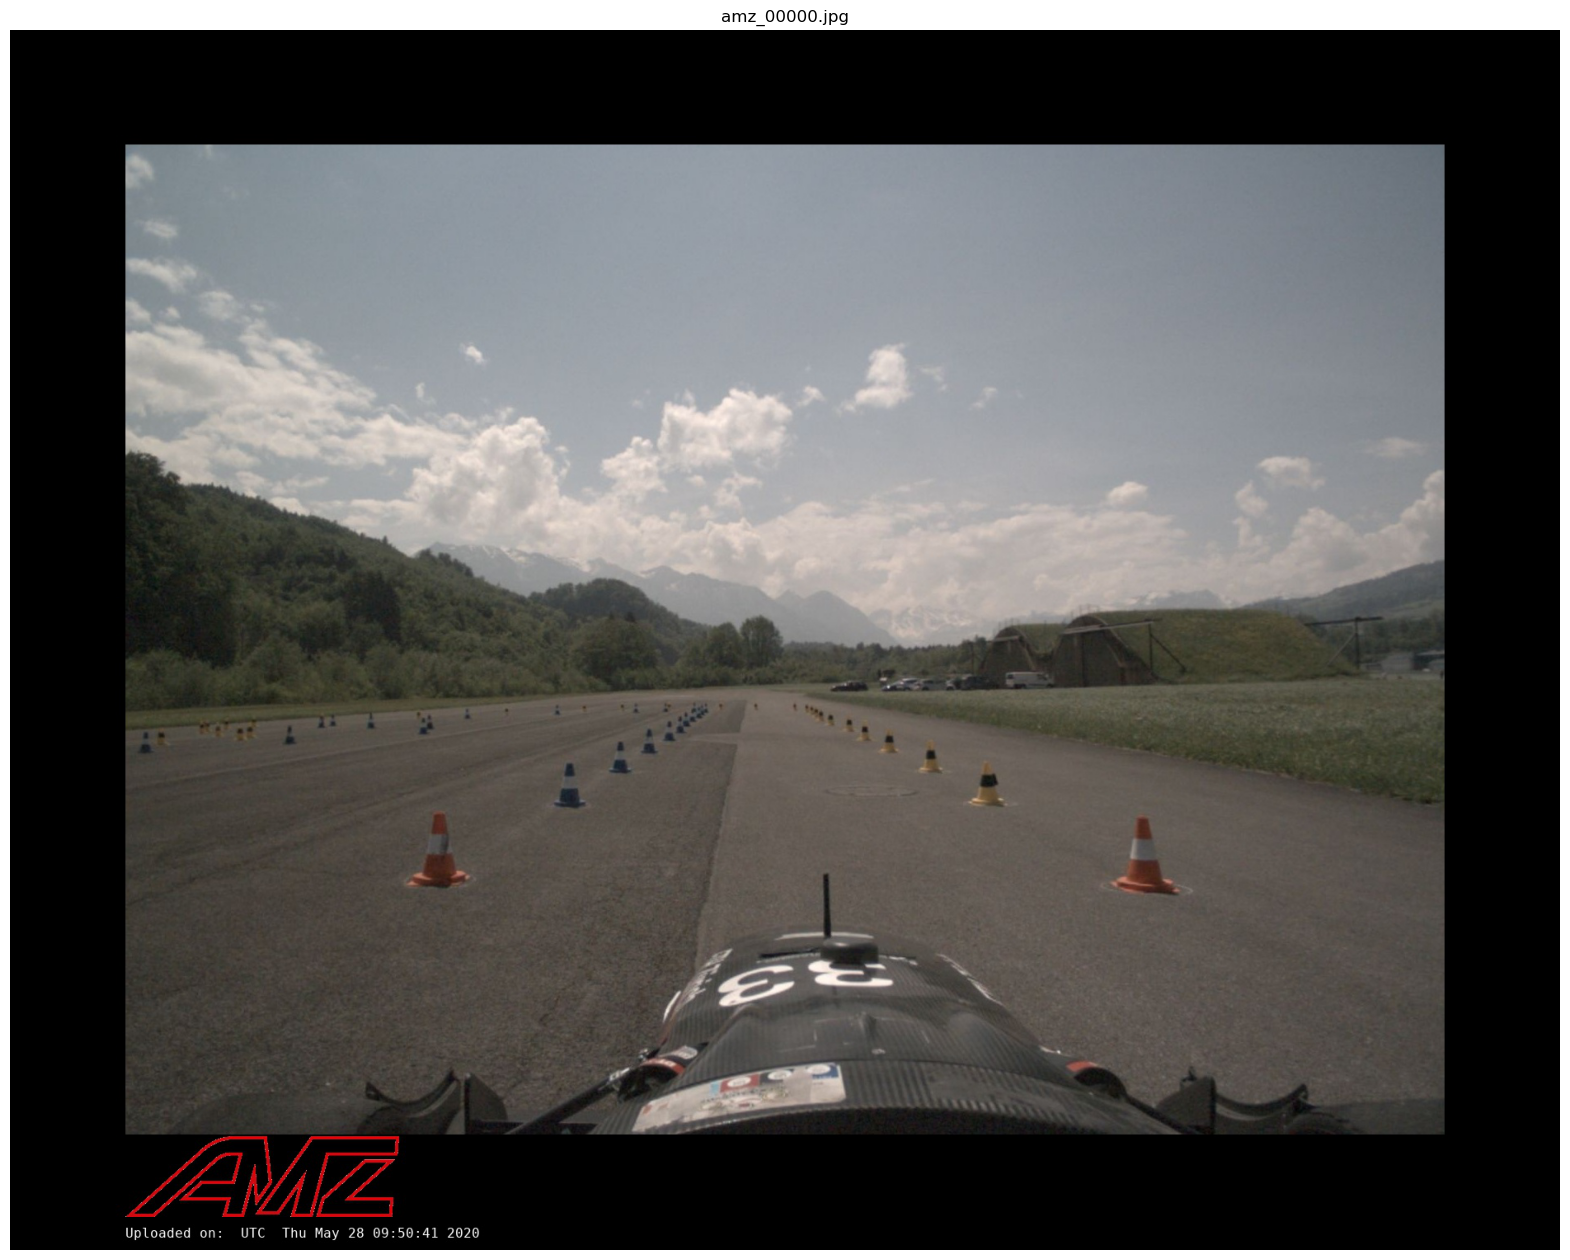

In [6]:
# Display first photo
img_path = os.path.join(dataset_dir, 'images')
img_name = 'amz_00000.jpg'

img_path = os.path.join(img_path, img_name)
img = image.load_img(img_path)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs that were preprocessed in the following way, so we must do the same now:
img_tensor /= 255.

print('Shape: ', img_tensor.shape)
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(img_tensor[0])
plt.title(img_name)
plt.axis('off')
plt.show()

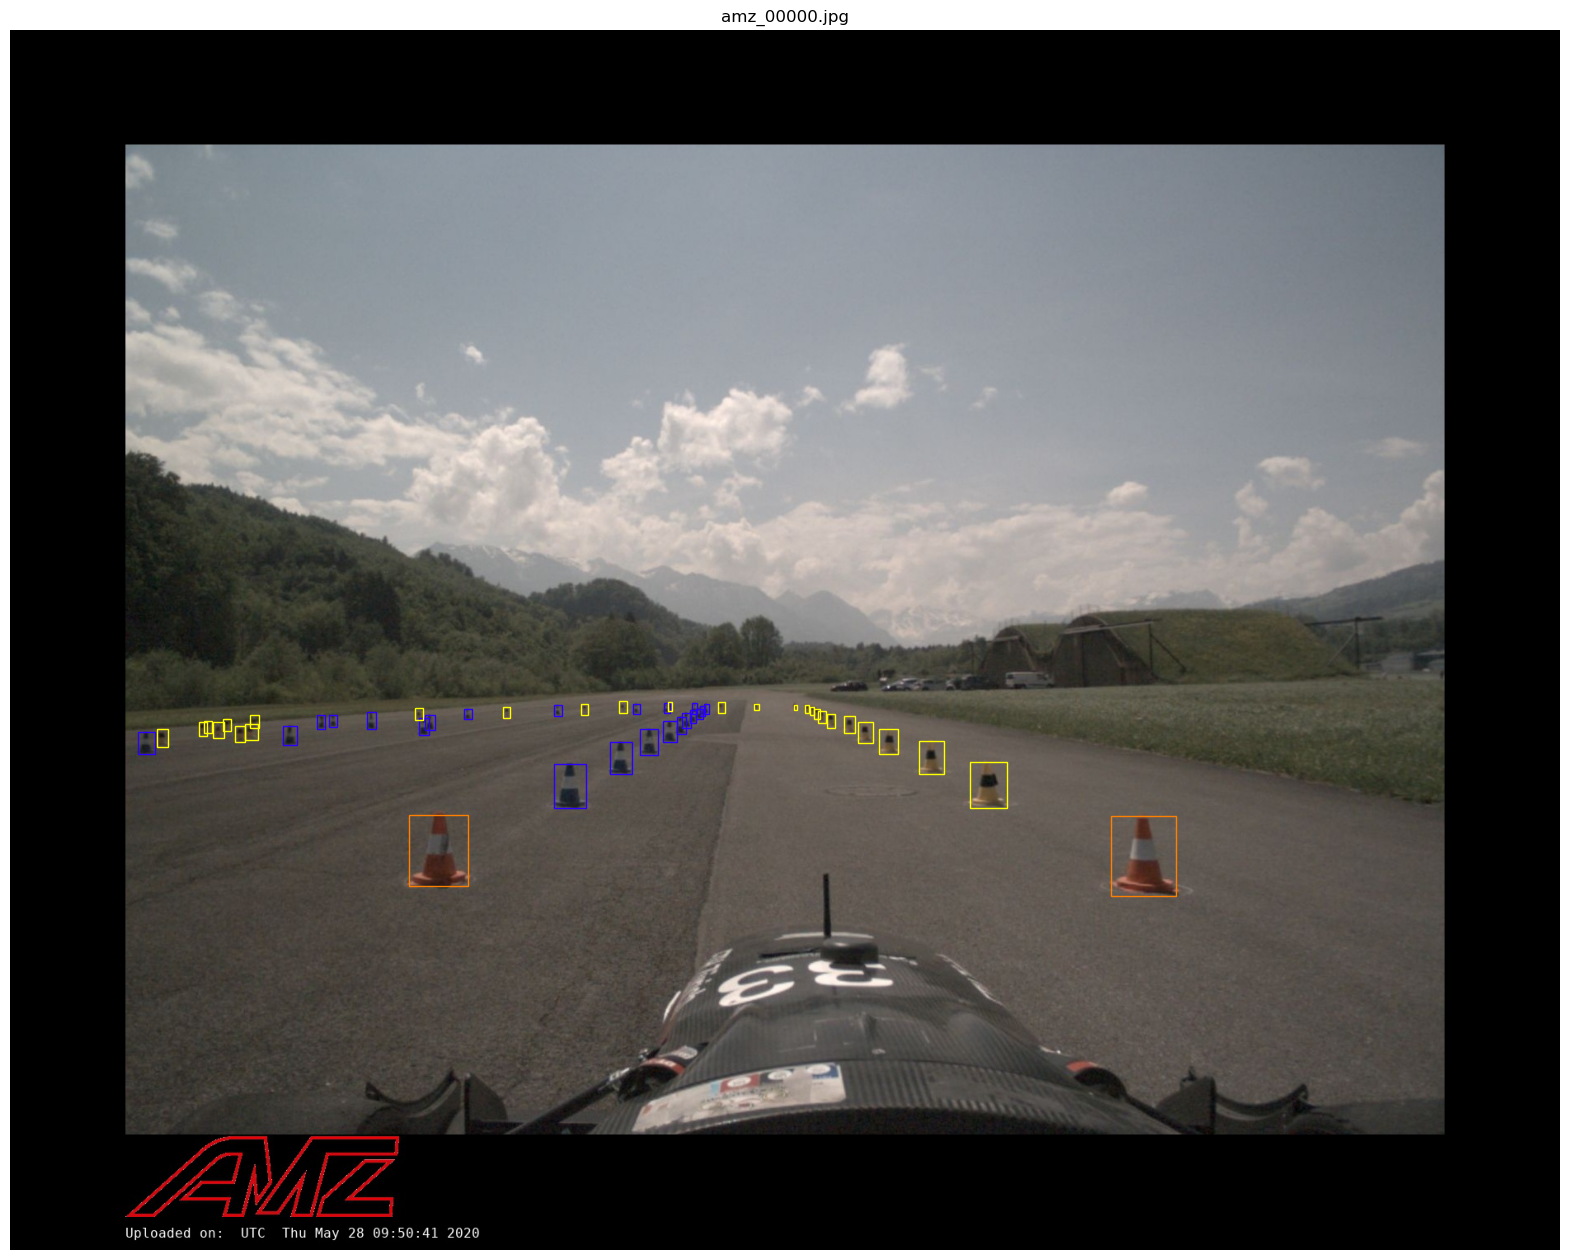

In [7]:
# Get photo data
ann_path = os.path.join(dataset_dir, 'annotations', f'{img_name}.json')
with open(ann_path) as f:
    annotations = json.load(f)

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(img_tensor[0])
for o in annotations['objects']:
    ax.add_patch(tools.draw_bounding_box(o))
plt.title(img_name)
plt.axis('off')
plt.show()